In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv(r"D:\corona\heart_Disease\heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
dataset = pd.get_dummies(data, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'], drop_first=True)


In [5]:
from sklearn.model_selection import train_test_split

X = data.drop('target', axis=1).values
y = data['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [6]:
# Normalization

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Random forest

In [7]:
from sklearn.ensemble import RandomForestClassifier

model_r = RandomForestClassifier(n_estimators=1000, n_jobs = -1, random_state = 40)
model_r.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=40, verbose=0,
                       warm_start=False)

In [8]:
y_train_pred = model_r.predict(X_train)
y_test_pred = model_r.predict(X_test)

In [9]:
pred = model_r.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix 
confusion_matrix(y_test, pred)

array([[26,  6],
       [ 0, 29]], dtype=int64)

### This is the accuracy of random forest

In [11]:
accuracy_score(y_test, model_r.predict(X_test))

0.9016393442622951

### ANN

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(100,activation='relu'))         # 100 : Number of neurons     We can also write it as : units = 100
model.add(Dense(50,activation='relu'))          # 50 : Number of neurons   
model.add(Dense(25,activation='relu'))          # 25 : Number of neurons
model.add(Dense(15,activation='relu'))          # 15 : Number of neurons
model.add(Dense(5,activation='relu'))           # 5 : Number of neurons

model.add(Dense(1,activation='sigmoid'))        # activation="sigmoid" : bcz it represents sigmoid curve i.e 1 or 0

# After each epochs of training our X_train we will run test data check our losses on the test data which will help us to keep
# track of how well our model is performing not just on our training data but also on our test data

model.compile(loss = "binary_crossentropy", optimizer = 'adam')

model.fit(x = X_train, y = y_train, epochs=200, validation_data=(X_test,y_test))

Train on 242 samples, validate on 61 samples
Epoch 1/200
242/242 [==============================] - 1s 5ms/sample - loss: 0.6831 - val_loss: 0.6717
Epoch 2/200
242/242 [==============================] - 0s 148us/sample - loss: 0.6467 - val_loss: 0.6060
Epoch 3/200
242/242 [==============================] - 0s 173us/sample - loss: 0.5953 - val_loss: 0.5440
Epoch 4/200
242/242 [==============================] - 0s 165us/sample - loss: 0.5362 - val_loss: 0.4795
Epoch 5/200
242/242 [==============================] - 0s 132us/sample - loss: 0.4757 - val_loss: 0.4283
Epoch 6/200
242/242 [==============================] - 0s 120us/sample - loss: 0.4274 - val_loss: 0.3906
Epoch 7/200
242/242 [==============================] - 0s 132us/sample - loss: 0.4043 - val_loss: 0.3742
Epoch 8/200
242/242 [==============================] - 0s 128us/sample - loss: 0.3869 - val_loss: 0.3571
Epoch 9/200
242/242 [==============================] - 0s 136us/sample - loss: 0.3864 - val_loss: 0.3447
Epoch 10/200

Epoch 78/200
242/242 [==============================] - 0s 132us/sample - loss: 0.0778 - val_loss: 0.5382
Epoch 79/200
242/242 [==============================] - 0s 120us/sample - loss: 0.0580 - val_loss: 0.6398
Epoch 80/200
242/242 [==============================] - 0s 124us/sample - loss: 0.0695 - val_loss: 0.5924
Epoch 81/200
242/242 [==============================] - 0s 120us/sample - loss: 0.0633 - val_loss: 0.5681
Epoch 82/200
242/242 [==============================] - 0s 115us/sample - loss: 0.0644 - val_loss: 0.6873
Epoch 83/200
242/242 [==============================] - 0s 128us/sample - loss: 0.0637 - val_loss: 0.6007
Epoch 84/200
242/242 [==============================] - 0s 124us/sample - loss: 0.0543 - val_loss: 0.6069
Epoch 85/200
242/242 [==============================] - 0s 124us/sample - loss: 0.0590 - val_loss: 0.7499
Epoch 86/200
242/242 [==============================] - 0s 120us/sample - loss: 0.0970 - val_loss: 0.5778
Epoch 87/200
242/242 [========================

Epoch 155/200
242/242 [==============================] - 0s 124us/sample - loss: 0.0051 - val_loss: 1.0586
Epoch 156/200
242/242 [==============================] - 0s 120us/sample - loss: 0.0044 - val_loss: 1.0885
Epoch 157/200
242/242 [==============================] - 0s 173us/sample - loss: 0.0032 - val_loss: 1.0521
Epoch 158/200
242/242 [==============================] - 0s 124us/sample - loss: 0.0032 - val_loss: 1.1012
Epoch 159/200
242/242 [==============================] - 0s 120us/sample - loss: 0.0028 - val_loss: 1.1006
Epoch 160/200
242/242 [==============================] - 0s 115us/sample - loss: 0.0025 - val_loss: 1.1086
Epoch 161/200
242/242 [==============================] - 0s 128us/sample - loss: 0.0023 - val_loss: 1.1214
Epoch 162/200
242/242 [==============================] - 0s 115us/sample - loss: 0.0020 - val_loss: 1.1209
Epoch 163/200
242/242 [==============================] - 0s 115us/sample - loss: 0.0020 - val_loss: 1.1325
Epoch 164/200
242/242 [==============

In [13]:
losses = pd.DataFrame(model.history.history)
losses

,loss,val_loss
0,0.683132,0.671749
1,0.646729,0.606025
2,0.595305,0.543974
3,0.536151,0.479521
4,0.475731,0.428346
...,...,...
195,0.000963,1.271264
196,0.000997,1.271397
197,0.000912,1.283842
198,0.000978,1.290807


In [14]:
# Stop automatically stop training data based of a loss condition on the validation data passed during the model.fit()

from tensorflow.keras.callbacks import EarlyStopping


early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=85) # verbose = 1 : we will see bunch of output

# patience : That means we will wait 85 epochs even after we detected a stopping point because of noice that could occur.  
# callbacks : This will prevent our model to overfitting

model.fit(x = X_train, y = y_train, epochs=200, validation_data=(X_test,y_test),callbacks=[early_stop])

Train on 242 samples, validate on 61 samples
Epoch 1/200
242/242 [==============================] - 0s 189us/sample - loss: 8.9989e-04 - val_loss: 1.2898
Epoch 2/200
242/242 [==============================] - 0s 148us/sample - loss: 8.7532e-04 - val_loss: 1.3034
Epoch 3/200
242/242 [==============================] - 0s 124us/sample - loss: 8.2795e-04 - val_loss: 1.2990
Epoch 4/200
242/242 [==============================] - 0s 144us/sample - loss: 8.3789e-04 - val_loss: 1.2965
Epoch 5/200
242/242 [==============================] - 0s 124us/sample - loss: 8.4209e-04 - val_loss: 1.3089
Epoch 6/200
242/242 [==============================] - 0s 124us/sample - loss: 8.1824e-04 - val_loss: 1.3046
Epoch 7/200
242/242 [==============================] - 0s 128us/sample - loss: 7.7490e-04 - val_loss: 1.3071
Epoch 8/200
242/242 [==============================] - 0s 157us/sample - loss: 8.1400e-04 - val_loss: 1.3140
Epoch 9/200
242/242 [==============================] - 0s 136us/sample - loss: 7.96

242/242 [==============================] - 0s 87us/sample - loss: 2.8956e-04 - val_loss: 1.4978
Epoch 76/200
242/242 [==============================] - 0s 87us/sample - loss: 2.9298e-04 - val_loss: 1.4983
Epoch 77/200
242/242 [==============================] - 0s 87us/sample - loss: 2.8624e-04 - val_loss: 1.5006
Epoch 78/200
242/242 [==============================] - 0s 91us/sample - loss: 2.8311e-04 - val_loss: 1.5084
Epoch 79/200
242/242 [==============================] - 0s 91us/sample - loss: 2.8626e-04 - val_loss: 1.5075
Epoch 80/200
242/242 [==============================] - 0s 111us/sample - loss: 2.7631e-04 - val_loss: 1.5073
Epoch 81/200
242/242 [==============================] - 0s 95us/sample - loss: 2.7222e-04 - val_loss: 1.5115
Epoch 82/200
242/242 [==============================] - 0s 87us/sample - loss: 2.8245e-04 - val_loss: 1.5119
Epoch 83/200
242/242 [==============================] - 0s 103us/sample - loss: 2.6125e-04 - val_loss: 1.5117
Epoch 84/200
242/242 [========

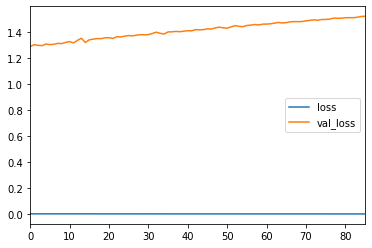

In [15]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [16]:
# Dropout help us to prevent overfitting



# Droupout : The term “dropout” refers to dropping out units (both hidden and visible) in a neural network.
# (0.5) is rate : Rate is the probability that we are going to randomly turnoff the actual neuron (0 : None, 1 : 100%)

# BackPropogation : Updating the weights and bias  

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model1 = Sequential()

model1.add(Dense(100,activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(50,activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(25,activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(15,activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(5,activation='relu'))
model1.add(Dropout(0.5))

model1.add(Dense(1,activation='sigmoid'))    # sigmoid : Becasue it is a BINARY-CLASSIFICATION problem


# After each epochs of training our X_train we will run test data check our losses on the test data which will help us to keep
# track of how well our model is performing not just on our training data but also on our test data

model1.compile(loss = "binary_crossentropy",optimizer='adam')

model1.fit(x = X_train, y = y_train, epochs=200, validation_data=(X_test,y_test), callbacks=[early_stop])

Train on 242 samples, validate on 61 samples
Epoch 1/200
242/242 [==============================] - 1s 3ms/sample - loss: 0.7531 - val_loss: 0.6911
Epoch 2/200
242/242 [==============================] - 0s 198us/sample - loss: 0.6831 - val_loss: 0.6922
Epoch 3/200
242/242 [==============================] - 0s 169us/sample - loss: 0.7112 - val_loss: 0.6936
Epoch 4/200
242/242 [==============================] - 0s 144us/sample - loss: 0.6875 - val_loss: 0.6947
Epoch 5/200
242/242 [==============================] - 0s 140us/sample - loss: 0.7118 - val_loss: 0.6946
Epoch 6/200
242/242 [==============================] - 0s 148us/sample - loss: 0.6989 - val_loss: 0.6949
Epoch 7/200
242/242 [==============================] - 0s 194us/sample - loss: 0.6894 - val_loss: 0.6955
Epoch 8/200
242/242 [==============================] - 0s 161us/sample - loss: 0.6889 - val_loss: 0.6952
Epoch 9/200
242/242 [==============================] - 0s 148us/sample - loss: 0.6972 - val_loss: 0.6951
Epoch 10/200

Epoch 78/200
242/242 [==============================] - 0s 157us/sample - loss: 0.5352 - val_loss: 0.4554
Epoch 79/200
242/242 [==============================] - 0s 132us/sample - loss: 0.5473 - val_loss: 0.4419
Epoch 80/200
242/242 [==============================] - 0s 268us/sample - loss: 0.5762 - val_loss: 0.4314
Epoch 81/200
242/242 [==============================] - 0s 140us/sample - loss: 0.5352 - val_loss: 0.4201
Epoch 82/200
242/242 [==============================] - 0s 128us/sample - loss: 0.5828 - val_loss: 0.4035
Epoch 83/200
242/242 [==============================] - 0s 132us/sample - loss: 0.5957 - val_loss: 0.4084
Epoch 84/200
242/242 [==============================] - 0s 132us/sample - loss: 0.5750 - val_loss: 0.4178
Epoch 85/200
242/242 [==============================] - 0s 128us/sample - loss: 0.5221 - val_loss: 0.3972
Epoch 86/200
242/242 [==============================] - 0s 115us/sample - loss: 0.6180 - val_loss: 0.4176
Epoch 87/200
242/242 [========================

Epoch 155/200
242/242 [==============================] - 0s 132us/sample - loss: 0.4706 - val_loss: 0.3374
Epoch 156/200
242/242 [==============================] - 0s 132us/sample - loss: 0.4171 - val_loss: 0.3356
Epoch 157/200
242/242 [==============================] - 0s 128us/sample - loss: 0.4502 - val_loss: 0.3283
Epoch 158/200
242/242 [==============================] - 0s 136us/sample - loss: 0.4463 - val_loss: 0.3285
Epoch 159/200
242/242 [==============================] - 0s 140us/sample - loss: 0.4569 - val_loss: 0.3262
Epoch 160/200
242/242 [==============================] - 0s 132us/sample - loss: 0.4439 - val_loss: 0.3171
Epoch 161/200
242/242 [==============================] - 0s 132us/sample - loss: 0.4654 - val_loss: 0.3095
Epoch 162/200
242/242 [==============================] - 0s 202us/sample - loss: 0.4616 - val_loss: 0.3141
Epoch 163/200
242/242 [==============================] - 0s 136us/sample - loss: 0.4680 - val_loss: 0.3179
Epoch 164/200
242/242 [==============

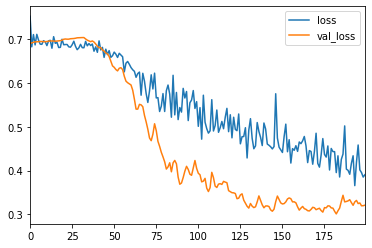

In [17]:
# Exploring what my model history looks like

# model.history.history : Gives History of our losses 


# loss = Loss of my training set
# val_loss = Loss of my test set

model1_loss = pd.DataFrame(model1.history.history)
model1_loss.plot()

In [18]:
# It will return our models loss

model1.evaluate(X_test,y_test,verbose=0)    # verbose = 0 : we will not see bunch of output  

0.32080178084920663

In [19]:
pred1 = model1.predict_classes(X_test)

In [20]:
# To check the accuracy of the model : Column : f1-score , Row : accuracy --> 90%


from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       1.00      0.84      0.92        32
           1       0.85      1.00      0.92        29

    accuracy                           0.92        61
   macro avg       0.93      0.92      0.92        61
weighted avg       0.93      0.92      0.92        61



In [21]:
# For detail explanation of confusion_matrix } https://www.infinitycodex.in/confusion-matrix-and-classification

# Our model only miss classify only 2 points in the test set.

print(confusion_matrix(y_test,pred1))

[[27  5]
 [ 0 29]]


### This is the accuracy of BPNN

In [22]:
accuracy_score(y_test, pred1)

0.9180327868852459